### Importante:

El primer paso para poder responder a la pregunta:

¿Cuánto de buenos son los resultados de las métricas de tu modelo? (mae,rmse,...)

Necesitas tener unas métricas con las que poder compararlas. Para ello, debes entrenar el modelo más sencillo (regresión/clasificación) para poder hacerlo. Este modelo se denomina "baseline". Con las métricas de este modelo ya puedes realizar una comparación y saber si el siguiente modelo da mejores o peores resultados.


In [3]:
import numpy as np
import sklearn.metrics as metrics
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    # RMSLE es usado cuando la variable targen se ha convertido al logaritmo (por ser su valor muy grande)
    if (y_true >= 0).all() and (y_pred >= 0).all():  
        mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
        print('mean_squared_log_error: ', round(mean_squared_log_error,4))

    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))  # Si se acerca a 1, habrá aprendido todos los patrones de nuestro modelo.  
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

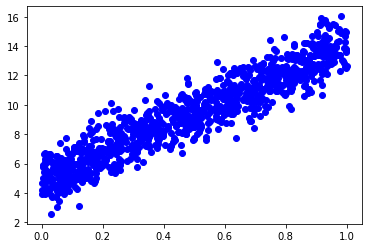

In [4]:
X = np.random.rand(1000, 1) 
X = X.reshape(-1, 1)
y = 5 + 9 * X + np.random.randn(1000, 1)

plt.scatter(X, y, color='b')

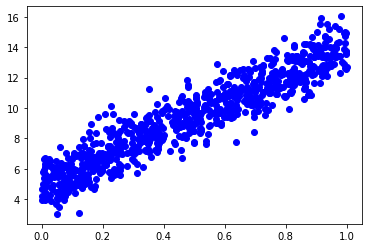

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train, y_train, color='b')

In [6]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_real = y_train
y_pred = linear_model.predict(X)
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

In [11]:
regression_results(y_true=y_train[:], y_pred=y_pred_train[:])

mean_squared_log_error:  0.0114
explained_variance:  0.8812
r2:  0.8812
MAE:  0.7903
MSE:  0.9641
RMSE:  0.9819


In [9]:
regression_results(y_true=y_test, y_pred=y_pred_test)

mean_squared_log_error:  0.0142
explained_variance:  0.8549
r2:  0.8548
MAE:  0.8869
MSE:  1.2071
RMSE:  1.0987


In [8]:
linear_model.score(X, y)

0.866645795314569

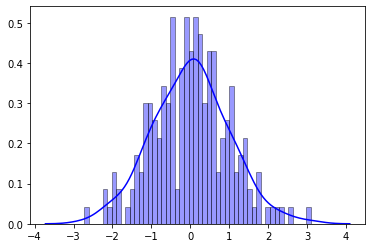

In [66]:
sns.distplot((y_test - y_pred_test), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

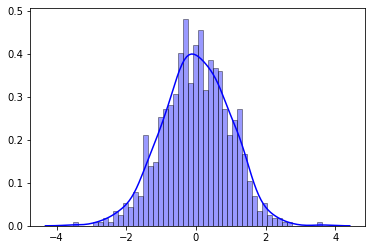

In [69]:
sns.distplot((y_train - y_pred_train), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

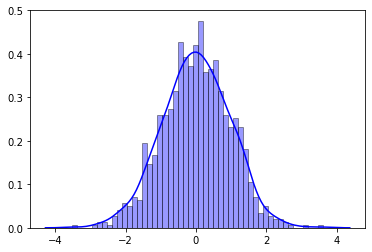

In [70]:
sns.distplot((y - y_pred), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')